In [1]:
!pip install vk_api


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


Первые 5 строк данных:
   post_id                                               text  likes  \
0  2995381  УМЕР ЛИАМ ПЕЙН.\n\n31-летнего певца и бывшего ...   2014   
1  2999975  Сегодня свой 55-й День Рождения в тюрьме отмеч...     65   
2  2999958  НАД АРИАНОЙ ГРАНДЕ ИЗДЕВАЛИСЬ В ШКОЛЕ ИЗ-ЗА ЕЁ...    172   
3  2999950  Небольшое напоминание от Megan Thee Stallion о...    119   
4  2999937  КИМ КАРДАШЬЯН ОСКВЕРНЯЕТ ПАМЯТЬ ПРИНЦЕССЫ ДИАН...    244   

   comments  reposts   views                          attachments  
0       118     1797  188732                       [photo, photo]  
1        13       43   10999  [photo, photo, photo, photo, photo]  
2         9       10   15896                       [photo, photo]  
3         2       17   10567                              [video]  
4        13       40   40222         [photo, photo, photo, photo]  


<Figure size 640x480 with 0 Axes>

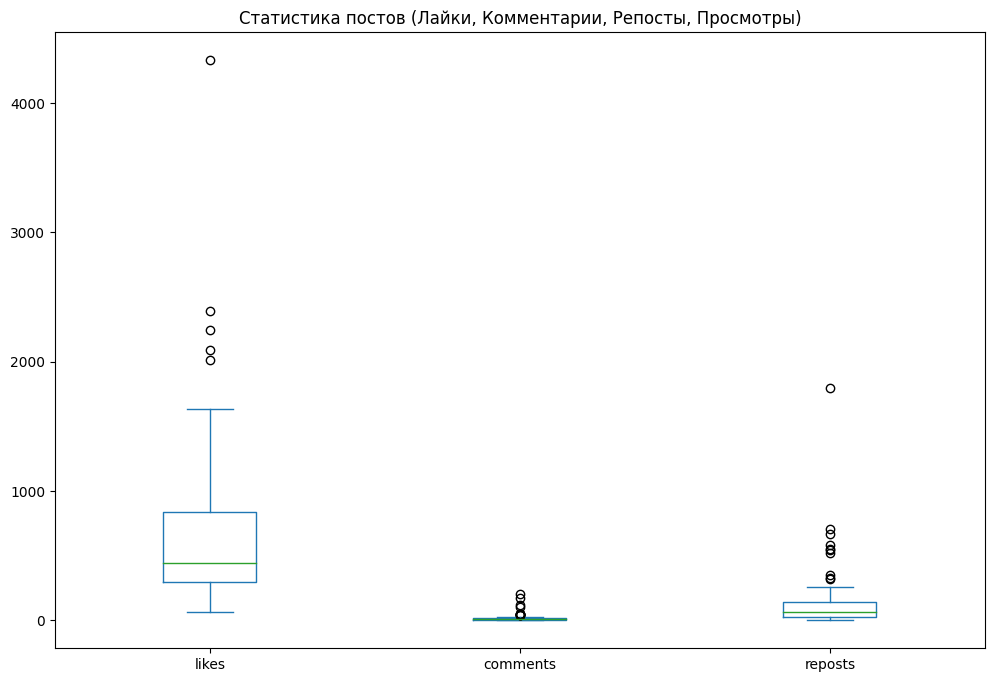


Медианные значения:
Лайки: 442.00
Комментарии: 9.50
Репосты: 66.00
Просмотры: 42752.50


In [2]:
import vk_api
import csv
import pandas as pd
import matplotlib.pyplot as plt

def scrape_wall_data(token, owner_id, count=100):
    """
    Функция scrape_wall_data извлекает данные со стены пользователя или сообщества VK.

    Аргументы:
    - token: Токен доступа VK API.
    - owner_id: ID пользователя или сообщества (с отрицательным значением для сообществ).
    - count: Количество постов для извлечения (по умолчанию 100).

    Возвращает:
    - Список словарей с данными о каждом посте.
    """
    try:
        # Инициализация VK API
        vk_session = vk_api.VkApi(token=token)
        vk = vk_session.get_api()

        # Метод wall.get
        posts = vk.wall.get(owner_id=owner_id, count=count)['items']

        # Хранилище для данных
        scraped_data = []

        # Парсинг
        for post in posts:
            post_data = {
                'post_id': post['id'],
                'text': post.get('text', ''),
                'likes': post['likes']['count'] if 'likes' in post else 0,
                'comments': post['comments']['count'] if 'comments' in post else 0,
                'reposts': post['reposts']['count'] if 'reposts' in post else 0,
                'views': post['views']['count'] if 'views' in post else 0,
                'attachments': [att['type'] for att in post.get('attachments', [])]
            }
            scraped_data.append(post_data)

        return scraped_data

    except vk_api.exceptions.ApiError as e:
        print(f"Error accessing VK API: {e}")
        return []

def save_to_csv(data, file_name='vk_wall_posts.csv'):
    """
    Сохраняет данные в CSV файл.

    Аргументы:
    - data: Список словарей с данными для сохранения.
    - file_name: Название файла для сохранения (по умолчанию 'vk_wall_posts.csv').
    """
    fieldnames = ['post_id', 'text', 'likes', 'comments', 'reposts', 'views', 'attachments']
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for row in data:
            writer.writerow(row)

def stats(data):
    """
    Функция для анализа и визуализации данных.
    
    Аргументы:
    - data: Список словарей с данными постов.
    """
    df = pd.DataFrame(data)
    
    # Вывод первых строк данных
    print("Первые 5 строк данных:")
    print(df.head())

    # Построение графиков по числу лайков, комментариев, репостов и просмотров
    plt.figure()
    # df[['likes', 'comments', 'reposts', 'views']].plot(kind='box')
    df[['likes', 'comments', 'reposts']].plot(kind='box', figsize=(12, 8))
    plt.title('Статистика постов (Лайки, Комментарии, Репосты, Просмотры)')
    plt.show()
    
    # Вывод среднего значения для лайков, комментариев и репостов
    print("\nМедианные значения:")
    print(f"Лайки: {df['likes'].median():.2f}")
    print(f"Комментарии: {df['comments'].median():.2f}")
    print(f"Репосты: {df['reposts'].median():.2f}")
    print(f"Просмотры: {df['views'].median():.2f}")
    
def main():
    # Введите ваш токен VK API
    token = 'vk1.a.40guRSnd-cQci1ti4pcOGs6kScy_P2_m5zJQ5lvO8xnJOlpX4eOcgfVJbPBtciZ7fcLhpuunpF5TpwhTOUGM4fb5OqbWNBQXgLHJc2WDtlH5tFYz3zJ_Ky7jwSLkt_RHhYhYbvmmj8khQbEZ-O0Tdx7UZHPsycVncGl2QHw-wM2_xEc5Ws3YsONinS9gTE-lvLEzh0q2F31jMtIryfBKqw'

    # Введите ID сообщества
    owner_id = -88397640  # Введите ID нужного сообщества

    # Количество публикаций для скрейпинга
    num_posts = 100

    # Запуск функции для скрейпинга
    wall_data = scrape_wall_data(token, owner_id, count=num_posts)

    if wall_data:
        # Сохранение данных в CSV файл
        save_to_csv(wall_data)

        # Вывод статистики по собранной информации
        stats(wall_data)
    else:
        print("Данные не найдены")

if __name__ == "__main__":
    main()
